### Import Libraries 

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
data = pd.read_csv(r"E:\Prodigy Tasks\US_Accidents_March23.csv")

In [3]:
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


### Checking the columns in the data 

In [4]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
print("Number of columns: ",len(data.columns))
print("Number of rows: ",len(data))

Number of columns:  46
Number of rows:  7728394


### Data Exploring & Preprocessing 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
# numerical data columns
len(data.select_dtypes(['int64', 'float64']).columns)

13

In [9]:
# Missing Values
data.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
# Incorrect Values
data.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
# Percentage of missing data per columns
data.isna().sum().sort_values(ascending=False) * 100. / len(data)

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [12]:
# Plotting a Pandas.Series data
missing_data = data.isna().sum().sort_values(ascending=False) * 100. / len(data)

In [13]:
type(missing_data) 
# we can directly plot the Pandas.Series using plot()

pandas.core.series.Series

<AxesSubplot:>

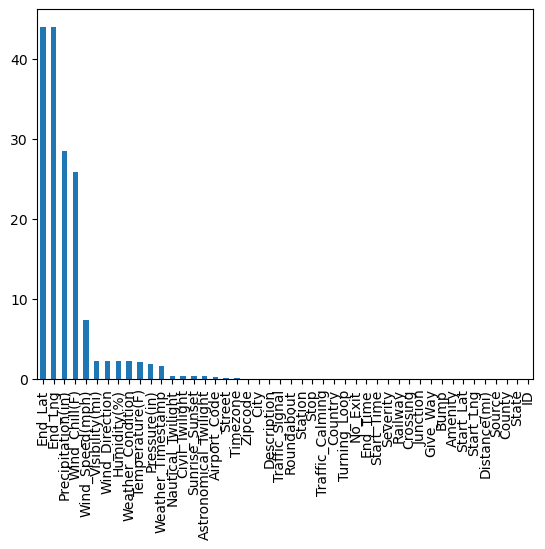

In [14]:
missing_data.plot(kind='bar')

<AxesSubplot:>

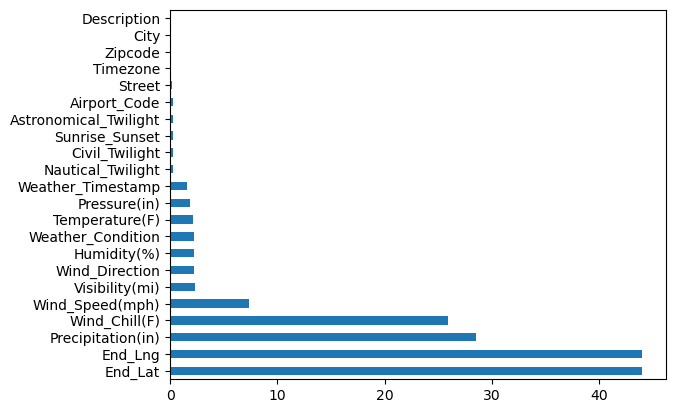

In [15]:
missing_data[missing_data!=0].plot(kind='barh')

In [17]:
# Printing all the columns
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
data.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [19]:
cities = data.City.unique()
len(cities)

13679

In [20]:
#Getting the number of accidents in each city over all years

In [21]:
cities_by_accident = data.City.value_counts()
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

In [22]:
'New York' in cities

True

In [23]:
cities_by_accident["New York"]

21699

<AxesSubplot:>

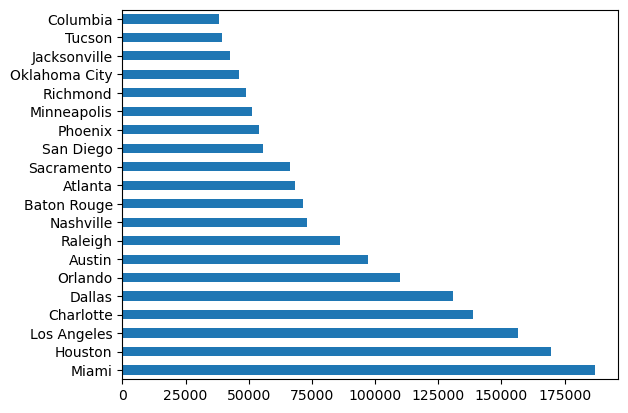

In [24]:
cities_by_accident[:20].plot(kind='barh')

### Plotting all the cities by number of accidents 

In [25]:
sns.set_style("darkgrid")

C:\Users\vardh\anaconda-new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

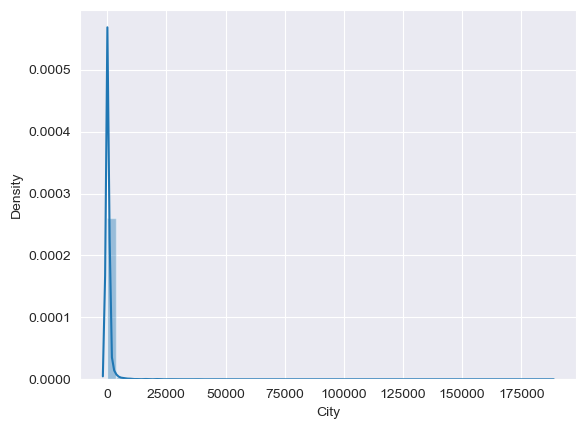

In [26]:
sns.distplot(cities_by_accident)

In [27]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000] # having over 1000 accidents
low_accident_cities = cities_by_accident[cities_by_accident < 1000]  # having less than 1000 accidents

In [28]:
# Percentage of high accident cities
len(high_accident_cities) / len(cities_by_accident)

0.08904810644831115

C:\Users\vardh\anaconda-new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

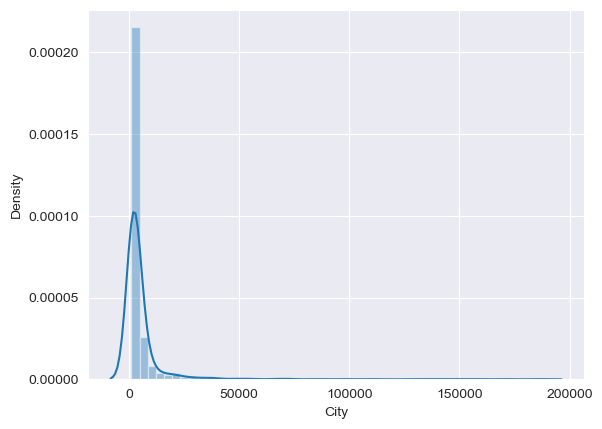

In [29]:
# Distribution of high accident cities
sns.distplot(high_accident_cities)

C:\Users\vardh\anaconda-new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

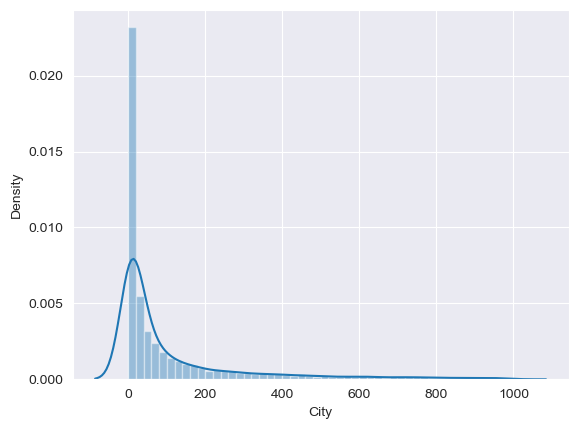

In [30]:
# Distribution of low accident cities
sns.distplot(low_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

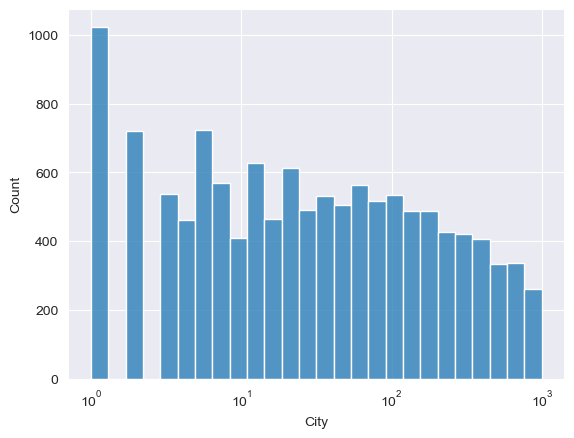

In [31]:
# Distribution of low accident cities
sns.histplot(low_accident_cities, log_scale=True)

<AxesSubplot:xlabel='City', ylabel='Count'>

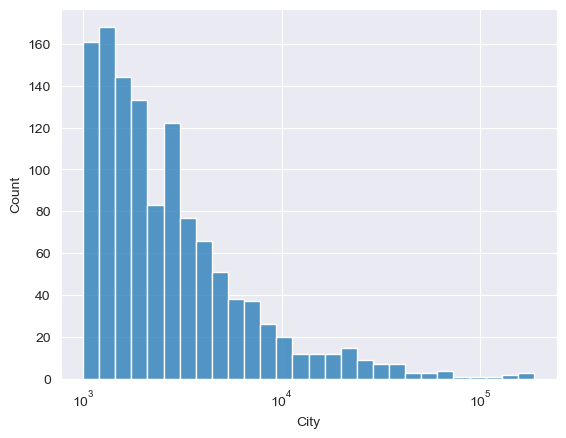

In [32]:
# Distribution of high accident cities
sns.histplot(high_accident_cities, log_scale=True)

### Plotting the latitudes & longitudes 

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

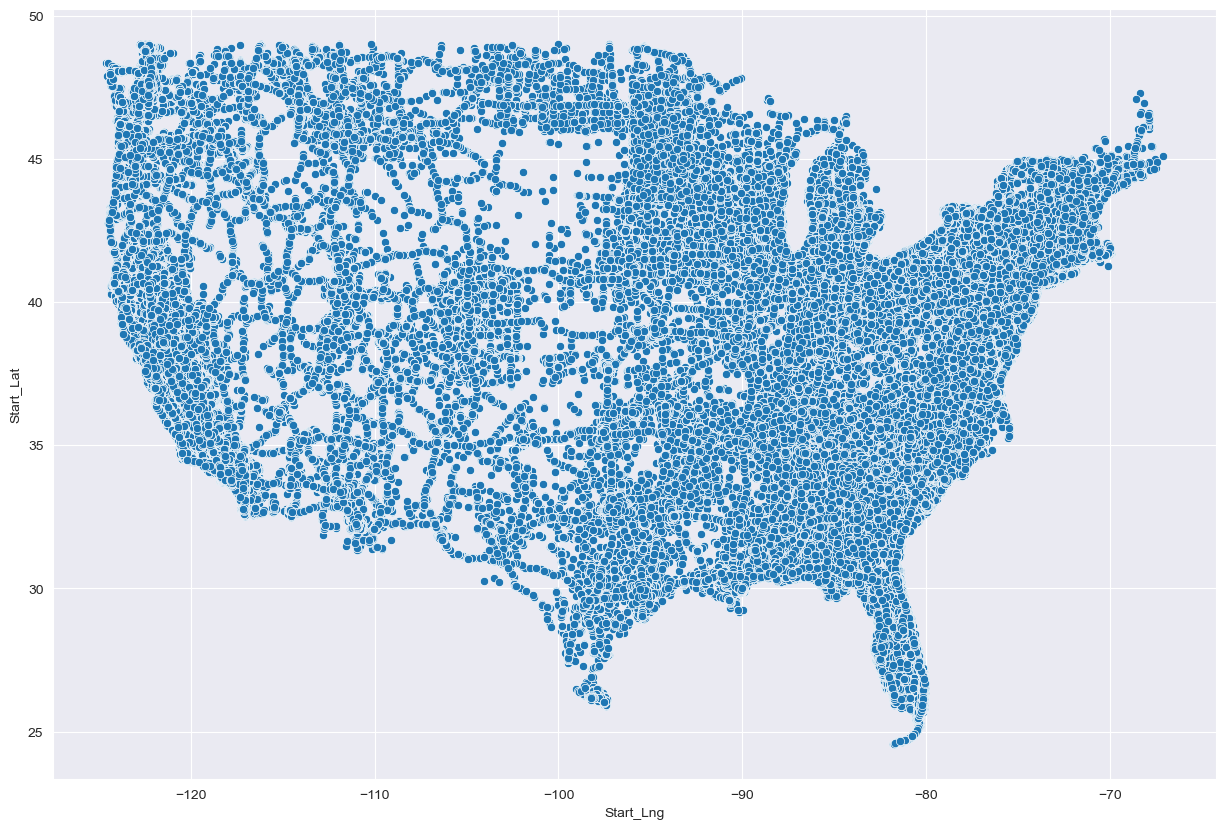

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=data.Start_Lat, x=data.Start_Lng)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

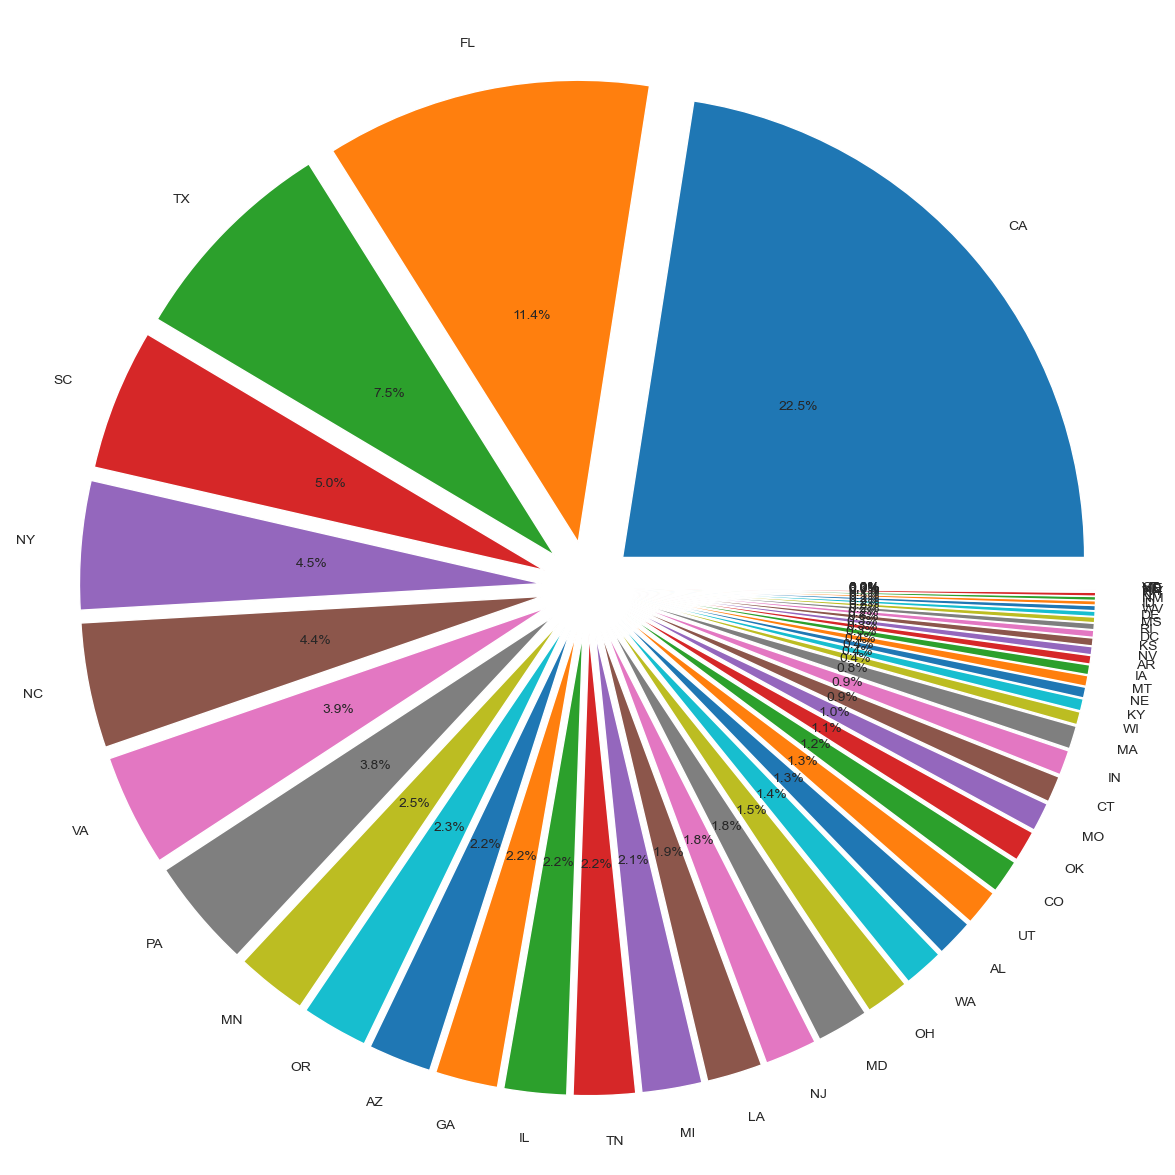

In [46]:
pie, ax = plt.subplots(figsize=[15,15])
labels = data.State.value_counts().keys()
plt.pie(x=data.State.value_counts(), autopct="%.1f%%", explode=[0.1]*len(data.State.value_counts()), labels=labels, pctdistance=0.5)
plt.show();

### Segregating accidents on the basis of severity

In [49]:
severe_accidents_4 = data[data.Severity==4].State.value_counts()
severe_accidents_3 = data[data.Severity==3].State.value_counts()
severe_accidents_2 = data[data.Severity==2].State.value_counts()
severe_accidents_1 = data[data.Severity==1].State.value_counts()

Text(0.5, 1.0, 'Most Severe Accidents: Severity=4')

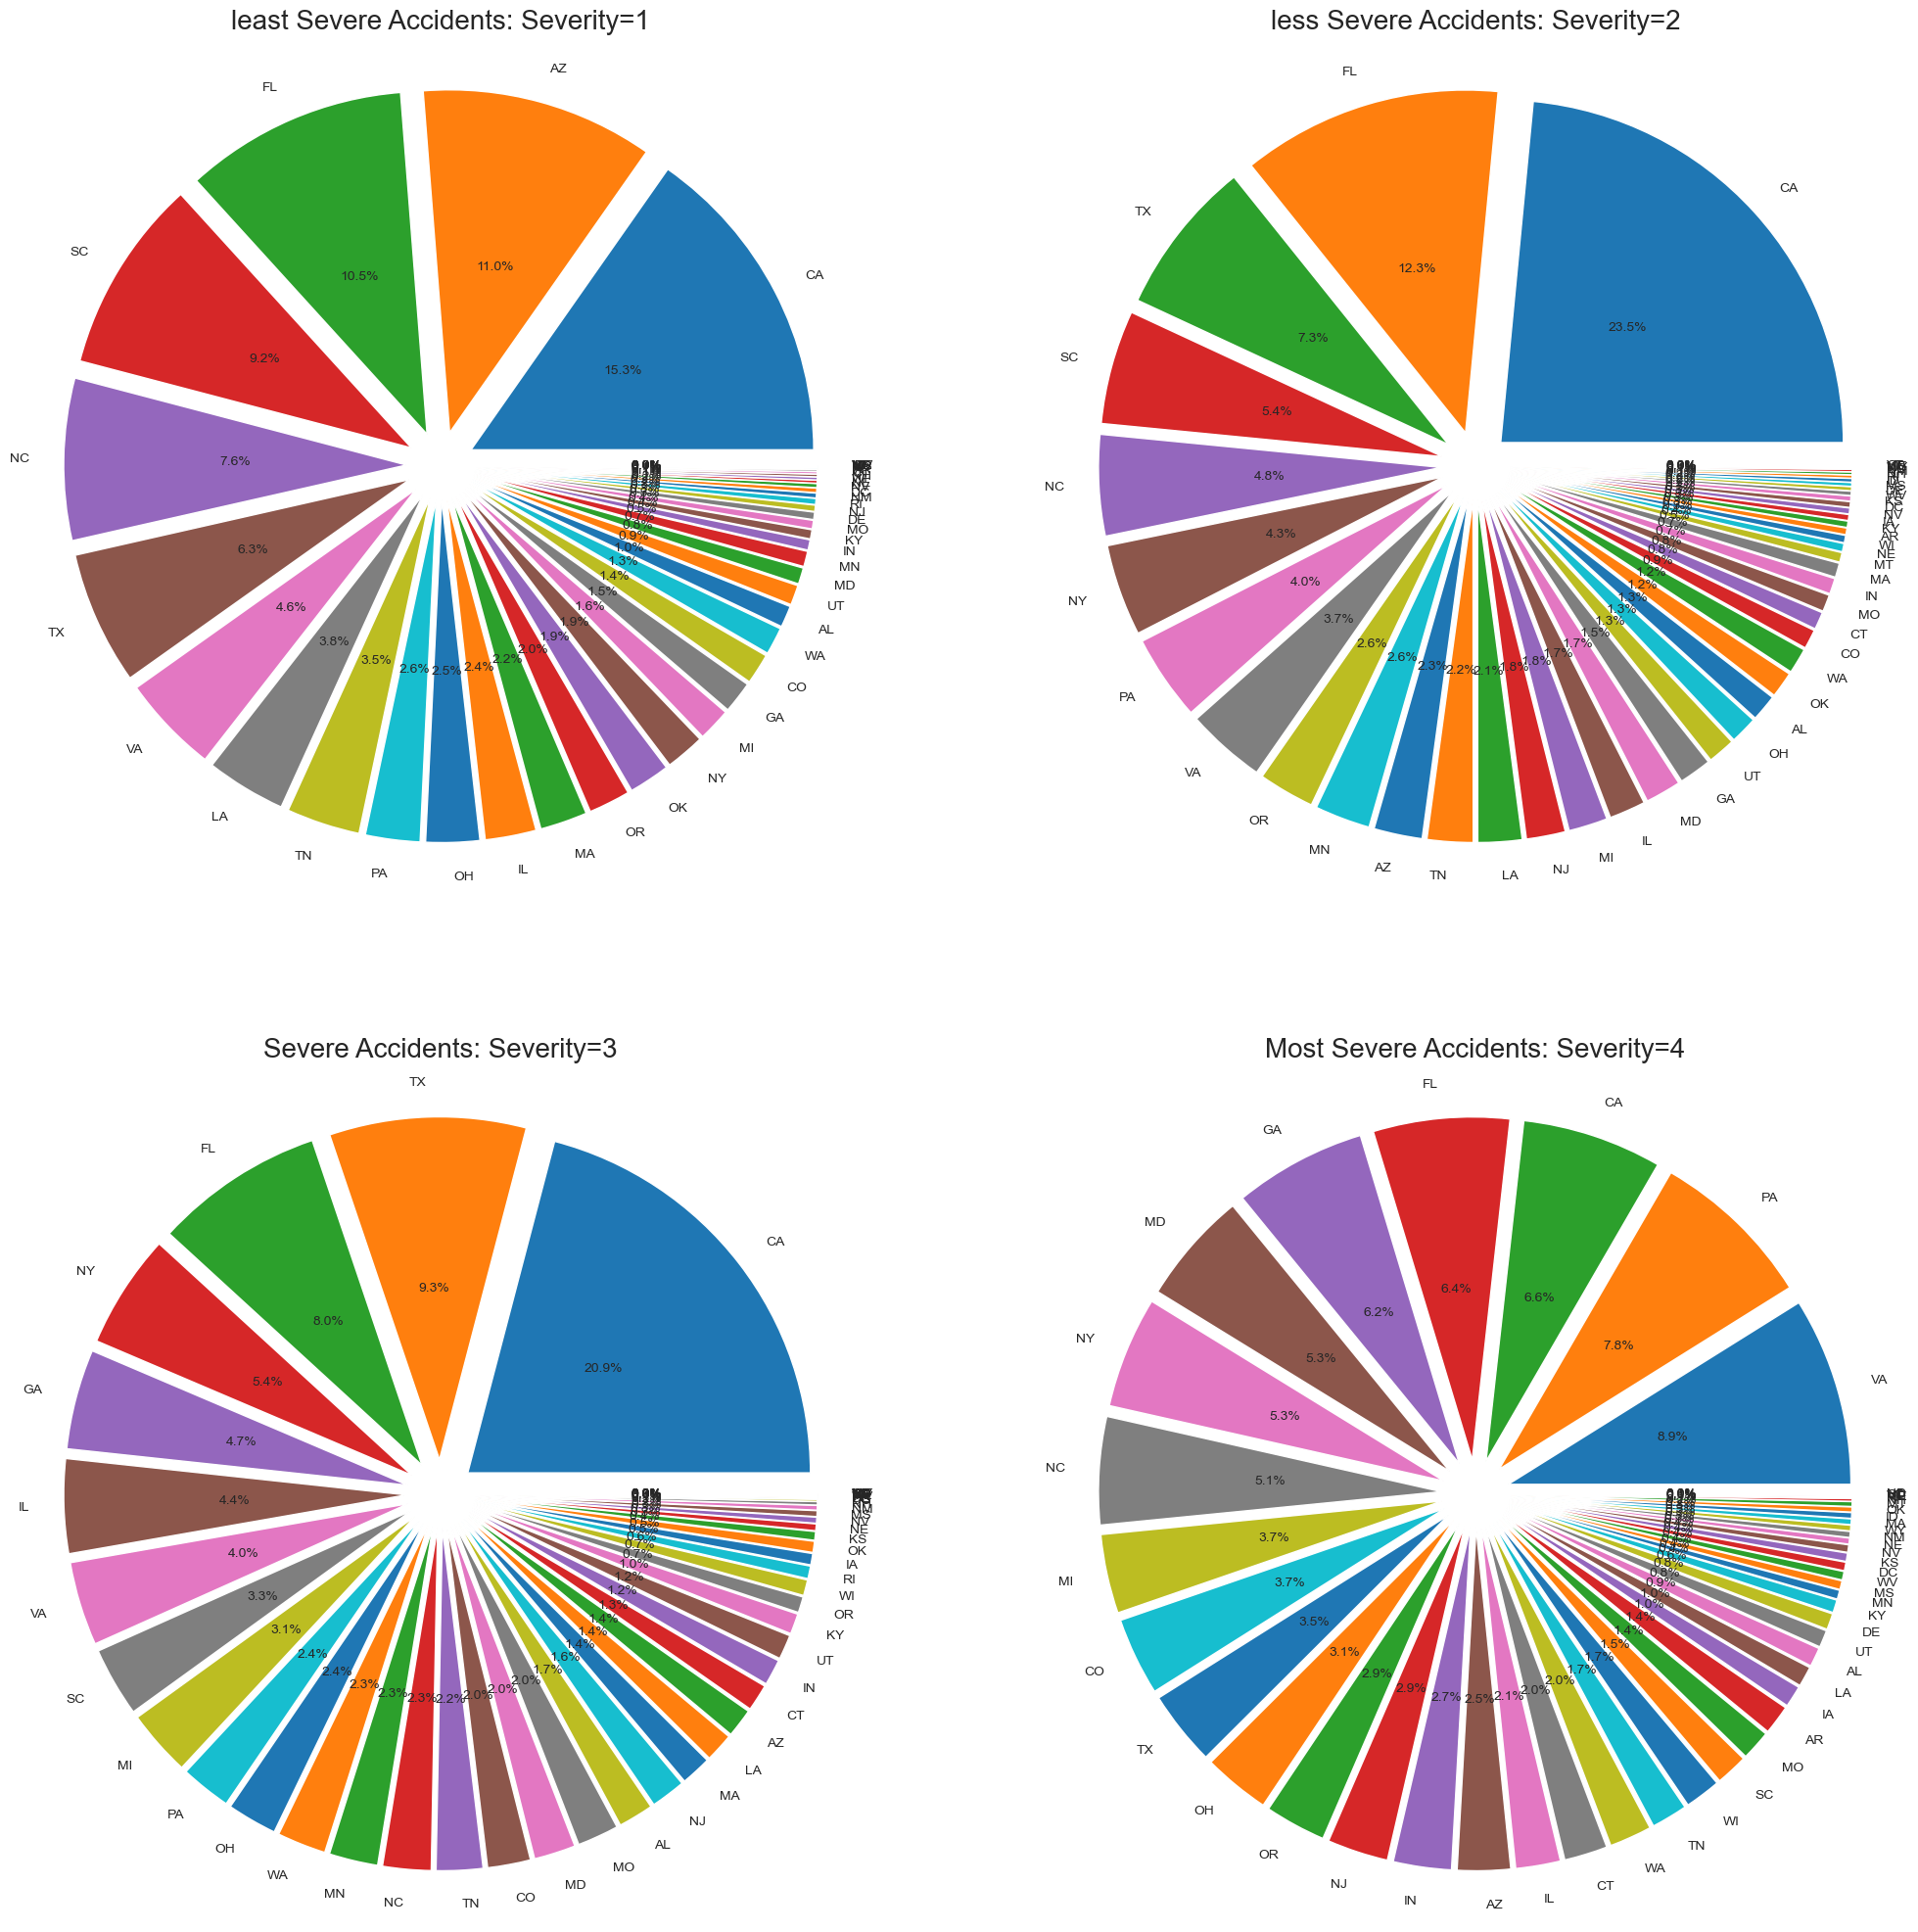

In [50]:
fig, ax1 = plt.subplots(figsize=[25,25])
ax1 = plt.subplot2grid((2,2),(0,0))
labels = severe_accidents_1.keys()
plt.pie(x=severe_accidents_1, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_1), labels=labels, pctdistance=0.5)
plt.title("least Severe Accidents: Severity=1", fontsize=20)

ax1 = plt.subplot2grid((2,2),(0,1))
labels = severe_accidents_2.keys()
plt.pie(x=severe_accidents_2, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_2), labels=labels, pctdistance=0.5)
plt.title("less Severe Accidents: Severity=2", fontsize=20)

ax1 = plt.subplot2grid((2,2),(1,0))
labels = severe_accidents_3.keys()
plt.pie(x=severe_accidents_3, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_3), labels=labels, pctdistance=0.5)
plt.title("Severe Accidents: Severity=3", fontsize=20)

ax1 = plt.subplot2grid((2,2),(1,1))
labels = severe_accidents_4.keys()
plt.pie(x=severe_accidents_4, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_4), labels=labels, pctdistance=0.5)
plt.title("Most Severe Accidents: Severity=4", fontsize=20)

### Inferences from the above plot
#### California generally seems to have the most accidents (in all categories)

### Day/Night Distribution of Accidents 

In [52]:
data.Sunrise_Sunset.value_counts()

Day      5334553
Night    2370595
Name: Sunrise_Sunset, dtype: int64

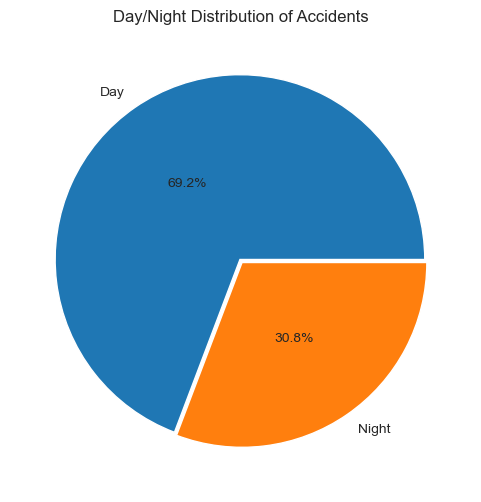

In [53]:
pie, ax = plt.subplots(figsize=[6,6])
labels = data.Sunrise_Sunset.value_counts().keys()
plt.pie(x=data.Sunrise_Sunset.value_counts(), autopct="%.1f%%", explode=[0.01]*len(data.Sunrise_Sunset.value_counts()), labels=labels, pctdistance=0.5)
plt.title("Day/Night Distribution of Accidents")
plt.show();